In [1]:
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pip install tqdm
from tqdm import tqdm
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
path='C:/Users/student/Downloads/데이터들/'

In [ ]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
trainingEpochs=15
batch_size=100

In [ ]:
x=tf.placeholder(tf.float32, [None, 28*28])
y=tf.placeholder(tf.float32, [None, 10])

In [ ]:
tf.reset_default_graph()
w1=tf.get_variable("w1",shape=[784,256], initializer=tf.contrib.layers.xavier_initializer()) # xavier 알고리즘으로 weight 초기화
#w1=tf.get_variable("w1",shape=[784,256], initializer=tf.keras.initializers.he_normal())
b1=tf.Variable(tf.random_normal([256]))
l1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=tf.get_variable("w2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
#w2=tf.get_variable("w2",shape=[256,256], initializer=tf.keras.initializers.he_normal())
b2=tf.Variable(tf.random_normal([256]))
l2=tf.nn.relu(tf.matmul(l1,w2)+b2)

w3=tf.get_variable("w3",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
#w3=tf.get_variable("w3",shape=[256,256], initializer=tf.keras.initializers.he_normal())
b3=tf.Variable(tf.random_normal([256]))
l3=tf.nn.relu(tf.matmul(l2,w3)+b3)

w4=tf.get_variable("w4",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
#w4=tf.get_variable("w4",shape=[256,256], initializer=tf.keras.initializers.he_normal())
b4=tf.Variable(tf.random_normal([256]))
l4=tf.nn.relu(tf.matmul(l3,w4)+b4)

w5=tf.get_variable("w5",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer()) 
#w5=tf.get_variable("w1",shape=[256,10], initializer=tf.kreas.initializers.he_normal())
b5=tf.Variable(tf.random_normal([10]))

hf=tf.matmul(l4,w5)+b5

In [ ]:
# xavior 알고리즘
# np.random.randn(입력노드수, 출력노드수)/np.sqrt(입력노드수)
#tf.contrib.layers.xavier_initializer()

# he 알고리즘
# np.random.randn(입력노드수, 출력노드수)/np.sqrt(입력노드수/2)
#tf.keras.initializers.he_normal()

In [ ]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
optimizer= tf.train.AdamOptimizer(0.001).minimize(cost)
prediction=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(prediction, tf.float32))
# 가중치 업데이트 방법

# 전통적 경사하강법은 매번 미분함 => 속도 느림, 비효과적인 최적해 찾기
# 확률적 경사하강법(sgd) => 속도 개선
# 모멘텀(momentum) sgd => 확률적 경사하강법 + 관성
# 아다그리드 : step size 조절 => 학습을 빠르게
# rmsprop : 아다그리드 개선 


In [ ]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainingEpochs):
    avgCost=0
    totalBatch=int(mnist.train.num_examples/batch_size)
    
    pbar=tqdm(range(totalBatch))
    
    for i in pbar:
        batchX,batchY=mnist.train.next_batch(batch_size)
        cv,_=sess.run([cost,optimizer], feed_dict={x:batchX, y:batchY},keep_prob:0.7) 
        # keep_prob : 여기서는 100개를 뽑았는데 그중 70개 랜덤하게 뽑아서 그것으로 트레이닝 시킴 / 모델 만들떄 사용해야함
        # 테스트할떄는 1을 줘야 함
        avgCost+=cv/totalBatch
        pbar.set_description('cost:%f'%avgCost)
print("정확도:", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

In [ ]:
labels=sess.run(tf.argmax(mnist.test.labels,1))
predictions=sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images, y:mnist.test.labels})
index=[]
ori=[]
pred=[]
for i in range(0, mnist.test.num_examples):
    if predictions[i]!=labels[i]:
        index.append(i)
        ori.append(labels[i])
        pred.append(predictions[i])
res=pd.DataFrame({"label":ori, "predict":pred, "index":index})
print(res)
plt.figure(figsize=(12,6))
plt.hist(res['predict'], bins=10)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.violinplot(x='label',y='predict', data=res)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='label',y='predict', data=res)
sns.despine(offset=10, trim=True)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

In [ ]:
ver=res.query("label==4").sample(n=8).index

In [ ]:
cnt=0
for n in ver:
    cnt+=1
    plt.subplot(4,4,cnt)
    plt.imshow(mnist.test.images[n].reshape(28,28), cmap='Greys')
    t="label:"+str(res['label'][n])+"pred::"+str(res['predict'][n])
    plt.title(t)

plt.tight_layout()
plt.show()

In [ ]:
# pimna 인디언 분석

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


In [ ]:
# seed 생성
np.random.seed(42)
tf.set_random_seed(42)

In [ ]:
data=np.loadtxt('C:/Users/student/Downloads/데이터들/dataset/pima-indians-diabetes.csv', delimiter=',')

In [ ]:
x=data[:,0:8]
y=data[:,8]

In [ ]:
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# softmax 떄는 categorical_crossentropy , binary classification이면 바이너리 저거
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(x,y,epochs=200,batch_size=10)

In [ ]:
model.evaluate(x,y) # cost, 정확도

In [ ]:
from keras.datasets import mnist
(trainImage,trainLabel),(testImage,testLabel)=mnist.load_data()

In [ ]:
digit=trainImage[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
model2=Sequential()
model2.add(Dense(512, input_shape=(28*28,), activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
trainImage=trainImage.reshape(60000,28*28)
trainImage=trainImage.astype('float32')/255
testImage=testImage.reshape(10000,28*28)
testImage=testImage.astype('float32')/255

In [4]:
from keras.utils import to_categorical
trainLabel=to_categorical(trainLabel)

In [ ]:
testLabel=to_categorical(testLabel)

In [ ]:
model2.fit(trainImage, trainLabel, epochs=5, batch_size=128) # 2^n 으로 주는게 좋음 뭐든지

In [ ]:
l, a=model2.evaluate(testImage, testLabel)
a

In [ ]:
"""
일반적(텐서플로) : 이미지(128, 높이, 너비, 3(채널))
씨아노 : 이미지(128, 채널, 높이, 너비)

비디오 : 5차원 텐서, 프레임의 연속
(프레임, 높이, 너비, 채널)
ex) 60초 짜리, 100*200 유튜브 비디오, 초당 4프레임을 샘플링
4*60=240 프레임
비디오 클립이 5개
(5, 240, 100, 200, 3(color))
"""

In [ ]:
# 영화 리뷰 분류

In [5]:
from keras.datasets import imdb

In [ ]:
(trainData,trainLabel),(testData, testLabel)=imdb.load_data(num_words=10000)
# 자주 등장하는 10000개 단어만 추출해서 사용

In [ ]:
trainData.shape # 25000,
trainData[0]
trainLabel[0] # 1 -> 긍정, 0 -> 부정

In [ ]:
#print([len(seq) for seq in trainData]) # 각각의 리뷰에 사용되어진 단어의 개수
print(max([max(seq) for seq in trainData]))

In [ ]:
wordIndex=imdb.get_word_index() # 단어와 단어에 해당하는 숫자를 매핑
wordIndex

In [ ]:
rev_wordIndex=dict([(value, key) for (key, value) in wordIndex.items()])

In [ ]:
decReview=" ".join([rev_wordIndex.get(i-3, "?") for i in trainData[0]])
# 0,1,2,3은 '',and,the,a 라서 필요가 없음 => 그래서 3개 단어는 그냥 ? 처리를 함

In [ ]:
# 단어 길이를 동일하게 하는 작업 : 패딩
# 동일한 길이의 리스가 되도록 패딩 작업수행
# ohe

In [ ]:
def vec_seq(data, dim=10000):
    res=np.zeros((len(data),dim))
    for i, s in enumerate(data):
        res[i,s]=1
    return res
    
xTrain=vec_seq(trainData)
xTest=vec_seq(testData)
#훈련데이터-> 벡터로 변환

In [ ]:
yTrain=trainLabel.astype("float32")
yTest=testLabel.astype("float32")

In [ ]:
# 신경망 모델
model=Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,))) # 출력:16 , relu, Dense 형태
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
xVal=xTrain[:10000]
p_xTrain=xTrain[10000:]
yVal=yTrain[:10000]
p_yTrain=yTrain[10000:]

In [ ]:
history=model.fit(p_xTrain, p_yTrain, epochs=20, batch_size=512, validation_data=(xVal, yVal))

In [ ]:
historyDict=history.history

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
epo=range(1,len(acc)+1)
plt.plot(epo, loss, 'bo', label='Training loss')
plt.plot(epo, val_loss, 'b', label='Val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(epo, acc, 'bo', label='Training accuracy')
plt.plot(epo, val_acc, 'b', label='Val accuracy')
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xTest, yTest)

In [ ]:
model.predict(xTest)

In [6]:
# 1번
# 실제 집 가격와 예측한 집 가격의 차이가 얼마나 나는지?
# loss='mae', optimizer='rmsprop', metrics=['mae'](평균절대오차)
# keras 버전, tensor 버전 2지로 만들기


# 2번
# iris.csv 아이리스 품종 분류기
# loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy']
# keras 버전, tensor 버전
from keras.datasets import boston_housing

In [7]:
(trainData,trainTargets),(testData, testTarget)=boston_housing.load_data()

In [8]:
xTrain=trainData[:283]
xVal=trainData[283:]
yTrain=trainTargets[:283]
yVal=trainTargets[283:]

In [9]:
trainData.shape # 404, 13
trainTargets # 집 가격
model=Sequential()

In [10]:
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

In [12]:
history=model.fit(xTrain, yTrain, epochs=100, batch_size=1,validation_data=(xVal,yVal))


Train on 283 samples, validate on 121 samples
Epoch 1/100
283/283 [==============================] - ETA: 29s - loss: 2715.9172 - mae: 52.11 - ETA: 0s - loss: 243.0863 - mae: 11.9345 - ETA: 0s - loss: 180.1317 - mae: 10.06 - ETA: 0s - loss: 169.7522 - mae: 9.6650 - ETA: 0s - loss: 150.7191 - mae: 9.194 - 0s 2ms/step - loss: 146.8660 - mae: 8.9981 - val_loss: 110.3103 - val_mae: 8.9046
Epoch 2/100
283/283 [==============================] - ETA: 0s - loss: 78.8919 - mae: 8.88 - ETA: 0s - loss: 123.6996 - mae: 7.619 - ETA: 0s - loss: 114.1618 - mae: 8.082 - ETA: 0s - loss: 94.0429 - mae: 7.177 - ETA: 0s - loss: 96.3762 - mae: 7.17 - ETA: 0s - loss: 92.4516 - mae: 6.99 - 0s 1ms/step - loss: 89.7088 - mae: 6.9279 - val_loss: 131.1029 - val_mae: 7.3270
Epoch 3/100
283/283 [==============================] - ETA: 0s - loss: 0.9430 - mae: 0.971 - ETA: 0s - loss: 80.8707 - mae: 6.45 - ETA: 0s - loss: 82.5029 - mae: 6.36 - ETA: 0s - loss: 78.3275 - mae: 6.28 - ETA: 0s - loss: 80.1880 - mae: 6.36

283/283 [==============================] - ETA: 0s - loss: 0.0106 - mae: 0.102 - ETA: 0s - loss: 12.0958 - mae: 2.58 - ETA: 0s - loss: 16.4422 - mae: 2.89 - ETA: 0s - loss: 19.6538 - mae: 3.26 - ETA: 0s - loss: 20.5517 - mae: 3.30 - ETA: 0s - loss: 21.6605 - mae: 3.30 - 0s 1ms/step - loss: 20.7167 - mae: 3.2375 - val_loss: 37.8581 - val_mae: 3.9375
Epoch 50/100
283/283 [==============================] - ETA: 0s - loss: 0.8597 - mae: 0.927 - ETA: 0s - loss: 23.6377 - mae: 3.45 - ETA: 0s - loss: 24.5882 - mae: 3.65 - ETA: 0s - loss: 21.5746 - mae: 3.39 - ETA: 0s - loss: 20.3286 - mae: 3.31 - 0s 1ms/step - loss: 19.9071 - mae: 3.2817 - val_loss: 62.4597 - val_mae: 4.9708
Epoch 51/100
283/283 [==============================] - ETA: 0s - loss: 0.6007 - mae: 0.775 - ETA: 0s - loss: 11.7887 - mae: 2.63 - ETA: 0s - loss: 13.3356 - mae: 2.74 - ETA: 0s - loss: 16.5776 - mae: 3.00 - ETA: 0s - loss: 17.5214 - mae: 3.09 - ETA: 0s - loss: 17.7929 - mae: 3.20 - 0s 1ms/step - loss: 17.5613 - mae: 3.18

283/283 [==============================] - ETA: 0s - loss: 4.9454 - mae: 2.223 - ETA: 0s - loss: 15.4281 - mae: 2.91 - ETA: 0s - loss: 14.5856 - mae: 2.88 - ETA: 0s - loss: 13.4252 - mae: 2.74 - ETA: 0s - loss: 15.5472 - mae: 2.92 - 0s 1ms/step - loss: 14.9826 - mae: 2.9040 - val_loss: 30.2468 - val_mae: 3.6946
Epoch 99/100
283/283 [==============================] - ETA: 0s - loss: 9.7147 - mae: 3.116 - ETA: 0s - loss: 10.6345 - mae: 2.33 - ETA: 0s - loss: 12.5559 - mae: 2.65 - ETA: 0s - loss: 14.3202 - mae: 2.76 - ETA: 0s - loss: 13.4277 - mae: 2.63 - 0s 1ms/step - loss: 14.5701 - mae: 2.7394 - val_loss: 24.3315 - val_mae: 3.5392
Epoch 100/100
283/283 [==============================] - ETA: 0s - loss: 0.6393 - mae: 0.799 - ETA: 0s - loss: 13.5829 - mae: 2.64 - ETA: 0s - loss: 13.2485 - mae: 2.63 - ETA: 0s - loss: 16.2745 - mae: 2.84 - ETA: 0s - loss: 15.0765 - mae: 2.74 - 0s 1ms/step - loss: 15.1080 - mae: 2.7512 - val_loss: 29.8174 - val_mae: 3.9839


In [13]:
min(history.history['mae'])

2.7165222

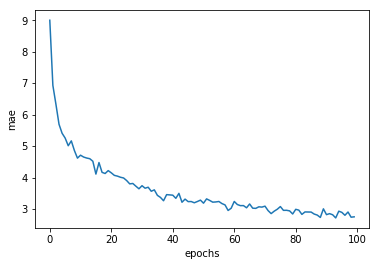

In [111]:
len(history.history['mae'])
epo=list(range(100))
mae=np.array(history.history['mae']).reshape(100,1)
plt.plot(epo,mae)
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

In [14]:
model.evaluate(testData,testTarget)
# [30.96131522982728, 4.224552631378174]
# 약 422달러의 오차가 있음

102/102 [==============================] - ETA:  - 0s 49us/step


[30.96131522982728, 4.224552631378174]

In [255]:
trainTargets=trainTargets.reshape(404,1)
testTarget=testTarget.reshape(102,1)
print(trainData.shape)
print(trainTargets.shape)
print(testData.shape)
print(testTarget.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [256]:
xTrain=trainData[:283]
xVal=trainData[283:]
yTrain=trainTargets[:283]
yVal=trainTargets[283:]

In [257]:
yTrain=yTrain.reshape(283,1)

In [258]:
yVal=yVal.reshape(121,1)

In [259]:
yTrain.shape
xTrain.shape

(283, 13)

In [260]:
# 1-2 tensorflow
x=tf.placeholder(tf.float32, shape=[None, 13])
y=tf.placeholder(tf.float32, shape=[None, 1])

In [261]:
w1=tf.Variable(tf.random_normal([13,64]))
b1=tf.Variable(tf.random_normal([64]))
l1=tf.sigmoid(tf.matmul(x,w1)+b1)

w2=tf.Variable(tf.random_normal([64,64]))
b2=tf.Variable(tf.random_normal([64]))
l2=tf.sigmoid(tf.matmul(l1,w2)+b2)

w3=tf.Variable(tf.random_normal([64,1]))
b3=tf.Variable(tf.random_normal([1]))
hf=tf.matmul(l2,w3)+b3

In [262]:
# 실제 값과 예측값의 차이가 얼마인지 궁금해서 노드 추가함
mae=tf.reduce_mean(abs(hf-y))

In [263]:
cost=tf.reduce_mean(tf.square(hf-y))

In [264]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [265]:
with tf.Session() as sess:
    predict_hf=[]
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv,hv=sess.run([train,cost,hf], feed_dict={x:xTrain,y:yTrain})
        predict_hf.append(hv)
        if step%1000==0:
            print(step,"step:",cv)
    mv=sess.run([mae], feed_dict={x:xVal,y:yVal})
    predict_hf.append(mv)
#     pre_hf=np.array(predict_hf).reshape(121,1)
#     val_range=list(range(len(pre_hf)))
#     plt.plot(val_range, pre_hf/len(pre_hf))

0 step: 451.35458
1000 step: 59.718624
2000 step: 59.117878
3000 step: 58.951256
4000 step: 58.870316
5000 step: 58.82525
6000 step: 58.77512
7000 step: 58.74639
8000 step: 58.726135
9000 step: 58.711304
10000 step: 58.70031
11000 step: 58.69712
12000 step: 58.692574
13000 step: 58.681446
14000 step: 58.6769
15000 step: 58.680584
16000 step: 58.674347
17000 step: 58.67293
18000 step: 58.671654
19000 step: 58.670578
20000 step: 58.669716


In [266]:
np.array(predict_hf).shape

(20002,)

In [233]:
len(pre_hf)

121